# Conditional Generative Adversarial Network

Conditional Generative Adversarial Nets - [Paper](https://arxiv.org/pdf/1411.1784.pdf)

Conditional GANs are constructed by feeding the data we wish to condition on to both the generator and discriminator.

$\min\limits_G\max\limits_D V(D,G) = \mathbb{E}_{x\sim p_{data}(x)} [log D(x|y)] + \mathbb{E}_{z\sim p_z(z)} [log(1 - D(G(z|y)))]$

Wasserstein Loss + Gradient Penalty + Diversity Score:

* Wasserstein loss for discriminator and generator models
* Linear activation in discriminator output instead of sigmoid
* Clip discriminator weights after each update
* Label smoothing for real outputs
* RMSprop instead of Adam
* Gradient penalty
* Diversity score
    
Note: The following implementation is for continuous variables. For discrete variables, implement an embedding layer.

<img align="center" src="https://user-images.githubusercontent.com/27071473/84100915-6b6a1f80-aa3f-11ea-976b-a2b53e449205.png" width=40%>

Ref: https://colab.research.google.com/github/timsainb/tensorflow2-generative-models/blob/master/3.0-WGAN-GP-fashion-mnist.ipynb#scrollTo=Wyipg-4oSYb1

# Synthetic Data

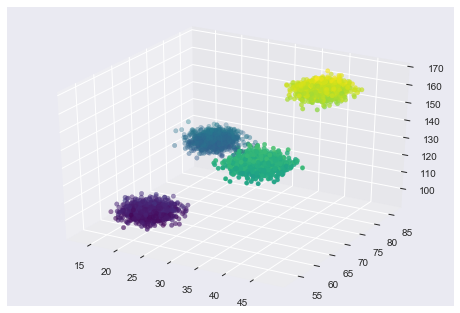

In [1]:
from data.synthetic import get_normal_data, plot_data

X, y = get_normal_data(1000, plot=True)

# Model: Conditional Generative Adversarial Network

In [11]:
from model.cgan import CGAN
cgan = CGAN(x_features=2,
            y_features=1,
            latent_dim=32,
            g_hidden=32,
            d_hidden=32,
            label_smooth=0.9,
            d_dropout=0.1,
            gp_weight=1,
            ds_weight=1)
cgan.fit(X, y, epochs=20000)

0 [D loss: 74.16265869140625] [G loss: -2.5940401554107666]
2000 [D loss: -282.291748046875] [G loss: 2816.265380859375]
4000 [D loss: -1299.9892578125] [G loss: 13343.5205078125]
6000 [D loss: -3674.44921875] [G loss: 36644.71484375]
8000 [D loss: -7667.8046875] [G loss: 77409.625]
10000 [D loss: -14195.03125] [G loss: 141137.203125]
12000 [D loss: -23138.015625] [G loss: 231886.28125]
14000 [D loss: -34885.5] [G loss: 354951.0]
16000 [D loss: -52114.25] [G loss: 516744.40625]
18000 [D loss: -72811.125] [G loss: 720823.0625]


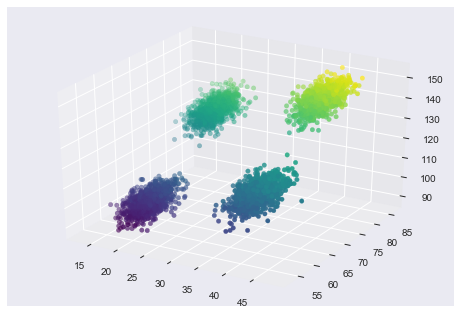

In [12]:
y_hat = cgan.predict(X)
plot_data(X, y_hat)

# Ax Bayesian Optimisation

[INFO 07-13 18:47:39] ipy_plotting: Injecting Plotly library into cell. Do not overwrite or delete cell.


[INFO 07-13 18:47:40] ax.modelbridge.dispatch_utils: Using Bayesian Optimization generation strategy: GenerationStrategy(name='Sobol+GPEI', steps=[Sobol for 7 trials, GPEI for subsequent trials]). Iterations after 7 will take longer to generate due to  model-fitting.
[INFO 07-13 18:47:40] ax.service.managed_loop: Started full optimization with 30 steps.
[INFO 07-13 18:47:40] ax.service.managed_loop: Running optimization trial 1...
[INFO 07-13 19:01:29] ax.service.managed_loop: Running optimization trial 2...
[INFO 07-13 19:21:25] ax.service.managed_loop: Running optimization trial 3...
[INFO 07-13 19:37:49] ax.service.managed_loop: Running optimization trial 4...
[INFO 07-13 19:53:39] ax.service.managed_loop: Running optimization trial 5...
[INFO 07-13 19:59:01] ax.service.managed_loop: Running optimization trial 6...
[INFO 07-13 20:22:19] ax.service.managed_loop: Running optimization trial 7...
[INFO 07-13 20:28:53] ax.service.managed_loop: Running optimization trial 8...
[INFO 07-13 

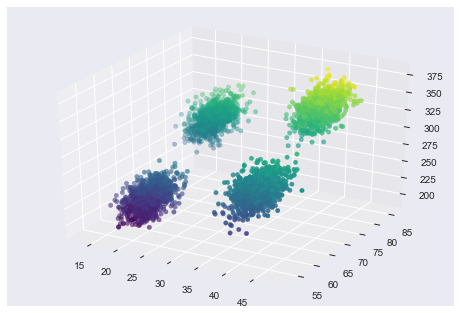

In [19]:
from model.cgan import CGAN
from hyperopt.hyperopt import hyperopt
from hyperopt.hyperopt import hyperopt_log, hyperparam_plot, performance_plot

params = {
    "x_features": 2,
    "y_features": 1,
    "epochs": 20000,
}
opt_params = {
    'latent_dim': [1,100],
    'g_hidden': [1,100],
    'd_hidden': [1,100],
    'label_smooth': [0.0,1.0],
    'd_dropout': [0.0, 0.9],
    'gp_weight': [0.0, 1.0],
    'ds_weight': [0.0, 1.0],
}

cgan, best_params, best_vals, experiment, exp_model = hyperopt(
    CGAN,
    params,
    opt_params,
    X, y,
    trials=30,
    val_split=0.8)

y_hat = cgan.predict(X)
plot_data(X, y_hat)

In [20]:
print(f"latent_dim: {cgan.latent_dim}")
print(f"g_hidden: {cgan.g_hidden}")
print(f"d_hidden: {cgan.d_hidden}")
print(f"label_smooth: {cgan.label_smooth}")
print(f"d_dropout: {cgan.d_dropout}")
print(f"gp_weight: {cgan.gp_weight}")
print(f"ds_weight: {cgan.ds_weight}")

display(hyperopt_log(experiment))
hyperparam_plot(exp_model, "g_hidden", "d_hidden")
hyperparam_plot(exp_model, "gp_weight", "ds_weight")
performance_plot(experiment, best_vals)

latent_dim: 36
g_hidden: 59
d_hidden: 1
label_smooth: 0.23576566580357267
d_dropout: 0.22637942132806071
gp_weight: 0.6982867341131863
ds_weight: 0.41994101986795285


latent_dim  g_hidden  d_hidden  label_smooth     d_dropout  gp_weight  \
0           50        84        56      0.575157  7.440602e-01   0.336734   
1           11        68        96      0.495047  2.254207e-01   0.984667   
2           96        94         7      0.826749  9.836236e-02   0.766833   
3           95        10        81      0.903706  6.597971e-01   0.044704   
4           33         3        14      0.246194  5.951862e-01   0.690183   
5           77        54        97      0.105783  2.792156e-01   0.407668   
6            9        33        25      0.548410  2.170174e-01   0.622885   
7           22        17        15      0.395994  4.225154e-01   0.645237   
8           20         1        33      0.300276  4.491013e-01   0.707947   
9           46        18        16      0.457922  4.373984e-01   0.738998   
10          80        77         4      0.750199  2.090666e-01   0.722730   
11          37        53        10      0.501630  3.542160e-01   0.596742   
12          30        38        18      0.427905  6.581497e-01   0.615049   
13          67        96        15      0.700791  2.320260e-01   0.647160   
14          74        77         9      0.571681  8.455109e-19   0.797211   
15          82        80        15      0.779325  0.000000e+00   0.661812   
16          96        71        12      0.536253  2.208978e-01   0.622248   
17          70        56        12      0.783920  1.254398e-01   0.647351   
18          84        71        15      0.730848  2.471287e-01   0.883521   
19          32        23        15      0.251322  3.384036e-01   0.533173   
20          44        45        13      0.102072  3.967016e-01   0.720141   
21          15        33        10      0.268299  4.291859e-01   0.881462   
22          55        39         2      0.266233  4.711692e-01   0.755056   
23          49        31         1      0.307668  1.646058e-01   0.789597   
24          31        25         1      0.193667  4.567138e-01   0.694980   
25          36        59         1      0.235766  2.263794e-01   0.698287   
26          48        61         1      0.331885  3.249455e-01   0.881887   
27          44        44         4      0.304745  3.149231e-01   0.754400   
28          46        19         1      0.000000  3.742037e-01   1.000000   
29          83        68         1      0.391061  2.743282e-01   0.992077   

       ds_weight          loss       fKL       rKL        JS  
0   2.626863e-01  2.870577e+06  0.508314 -0.076010  0.047141  
1   4.558231e-01  8.285211e+06  0.000000  0.000000  0.000000  
2   1.800286e-01  5.009918e+04 -0.122109  0.302318  0.021262  
3   1.589623e-01  5.273222e+06  0.337885  0.875022  0.135263  
4   7.824490e-01  1.942355e+05  0.000000  0.000000  0.000000  
5   8.067897e-02  8.444173e+06  0.000000  0.000000  0.000000  
6   9.829719e-01  6.153194e+05  0.000000  0.000000  0.000000  
7   8.919758e-01  2.276103e+05  0.000000  0.000000  0.000000  
8   9.083120e-01  1.056164e+06  0.000000  0.000000  0.000000  
9   7.466001e-01  2.462813e+05  0.000000  0.000000  0.000000  
10  3.572980e-01  1.362272e+04  0.014070  0.083236  0.012063  
11  6.322421e-01  9.971852e+04  0.000000  0.000000  0.000000  
12  7.087535e-01  3.109577e+05  0.000000  0.000000  0.000000  
13  2.514695e-01  2.310730e+05 -0.040037  0.045071  0.000629  
14  2.830258e-01  8.396782e+04  0.000000  0.000000  0.000000  
15  4.813124e-01  2.214660e+05 -0.014428  0.588656  0.065593  
16  2.991214e-01  1.483444e+05  0.000000  0.000000  0.000000  
17  1.807908e-01  1.526865e+05  0.541756  0.278004  0.088252  
18  3.113003e-01  2.214995e+05  0.304607  0.183062  0.053693  
19  5.041976e-01  2.244737e+05  0.000000  0.000000  0.000000  
20  7.857734e-01  1.612895e+05  0.000000  0.000000  0.000000  
21  5.608596e-01  1.043760e+05  0.000000  0.000000  0.000000  
22  4.173705e-01  3.746370e+03  0.000000  0.000000  0.000000  
23  5.730553e-01  7.755994e+02  0.000000  0.000000  0.000000  
24  6.727747e-01  2.410432e+02  0.000000 

# Qualitative Validation: Visualisation

In [21]:
from visualisation.visualisation import (plot_surface,
                                         plot_prob_fixed,
                                         plot_violin,
                                         plot_prob_violin,
                                         plot_binned_violin)

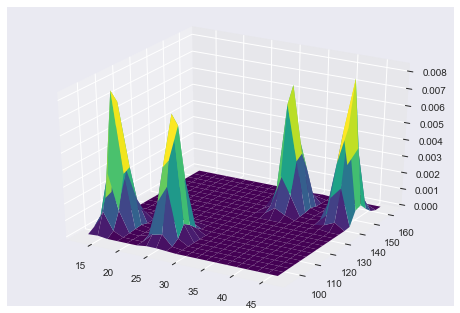

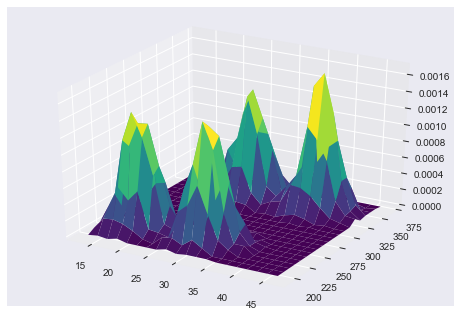

In [22]:
# Plot the density function based on X1 and X2
plot_surface(X[:,0], y[:,0], bins=20)
plot_surface(X[:,0], y_hat[:,0], bins=20)

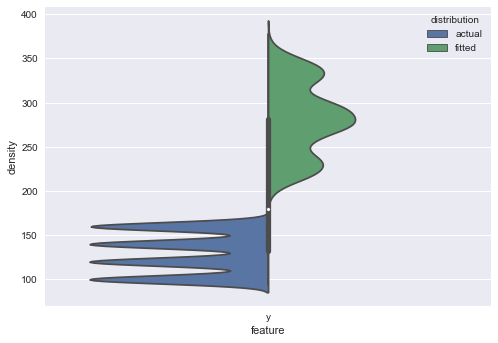

In [23]:
# Given 2 sets of data, plot a violin plot to compare the probability density function. 
plot_violin(y[:,0], y_hat[:,0], feature="y")

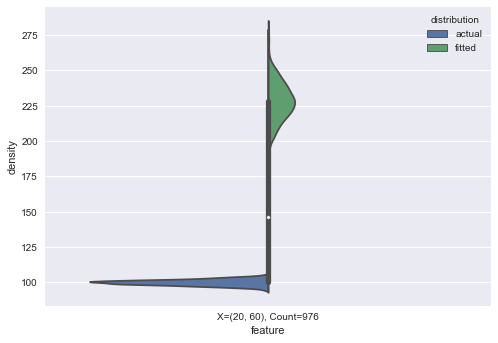

In [24]:
# Given X, plot a violin of y based on X within a tolerance, to compare the distribution between fitted and actual.
# X_tol represents the tolerance to which X data is binned to get the corresponding y.
# X_fixed represents the X fed into the model to sample y.
plot_prob_violin(cgan, X, y, X_fixed=(20,60), X_tol=(5,5))

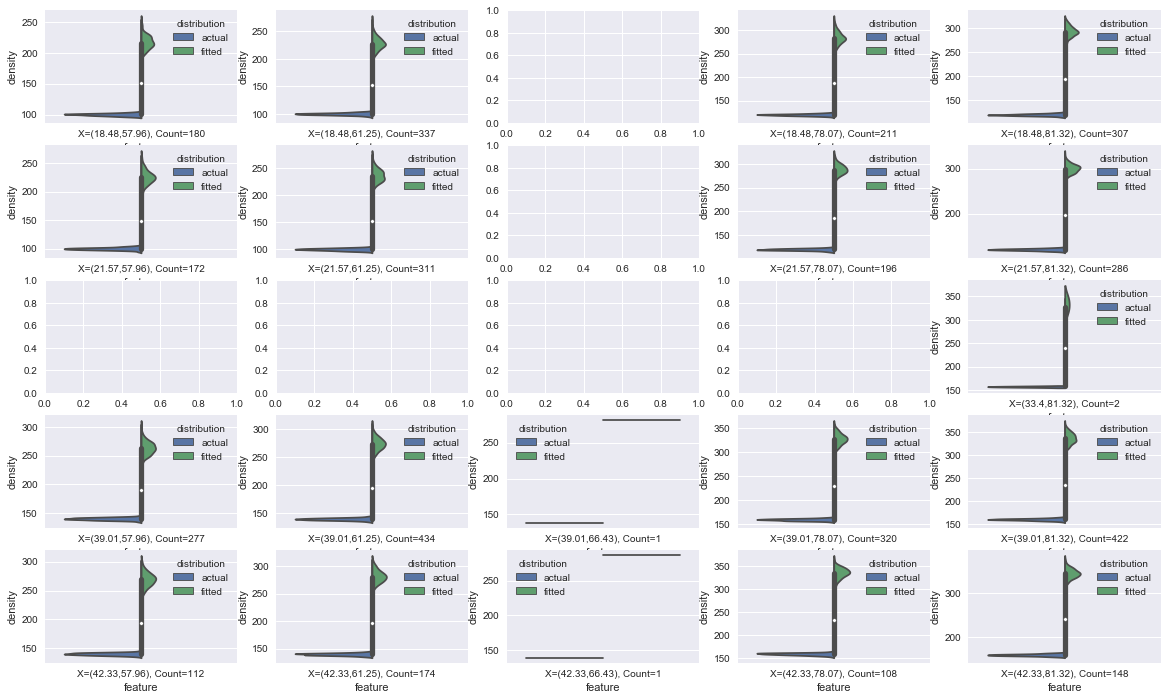

In [25]:
# Given X and y, plot a violin of y based on binned X, to compare between fitted and actual.
# For the actual distribution, bin X and plot violin plots for the density of y.
# For the fitted distribution, input the mean of binned X and plot violin plots for the density of sampled y.
plot_binned_violin(cgan, X, y, bins=5)

# Quantitative Validation: Metrics

In [26]:
from performance.performance import prob_overlap, kl, js

p, q = prob_overlap(y, y_hat, bins=10)
print("fKL:", kl(p, q))
print("rKL:", kl(q, p))
print("JS:", js(p, q))

fKL: 0.0
rKL: 0.0
JS: 0.0
